In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [1]:
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the Excel file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SL - DataScience/data_pokemon.xlsx')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())


| Nome         | HP   | Attack   | Defense   | Sp.Atk   | Sp.Def   | Speed   | Evs HP   | Evs atk   | Evs def   | Evs Sp.atk   | Evs Sp.def   | Evs sp   | Ivs HP   | Ivs Atk   | Ivs Def   | Ivs Sp.atk   | Ivs Sp.def   | Ivs Speed   | Type 1   | Type 2   | item effect   | move1 power   | move 1 type   | status effect move 1   | move 1 priority   | move2 power   | move 2 type   | status effect move 2   | move 2 pri   | move3 power   | move 3 type   | status effect move 3   | move 3 pri   | move4 power   | move4 type   | status effect move 4   | move 4 pri   | Nature   | Ability   | Target   |
|:-------------|:-----|:---------|:----------|:---------|:---------|:--------|:---------|:----------|:----------|:-------------|:-------------|:---------|:---------|:----------|:----------|:-------------|:-------------|:------------|:---------|:---------|:--------------|:--------------|:--------------|:-----------------------|:------------------|:--------------|:--------------|:---------------------

In [3]:
# Fix a value of 'Type 1' which is wrongly written
df['Type 1'] = df['Type 1'].str.replace('Dark ', 'Dark')
df['Type 1'].unique()

array(['Fairy', 'Grass', 'Fighting', 'Ice', 'Steel', 'Flying', 'Dark',
       'Electric', 'Fire', 'Dragon', 'Normal', 'Ground', 'Ghost', 'Water',
       'Rock', 'Poison', 'Bug', 'Psychic'], dtype=object)

# Target Variable Analysis

<ipython-input-5-34890aa4ff9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type 1', y='Target', data=df, palette='Blues')


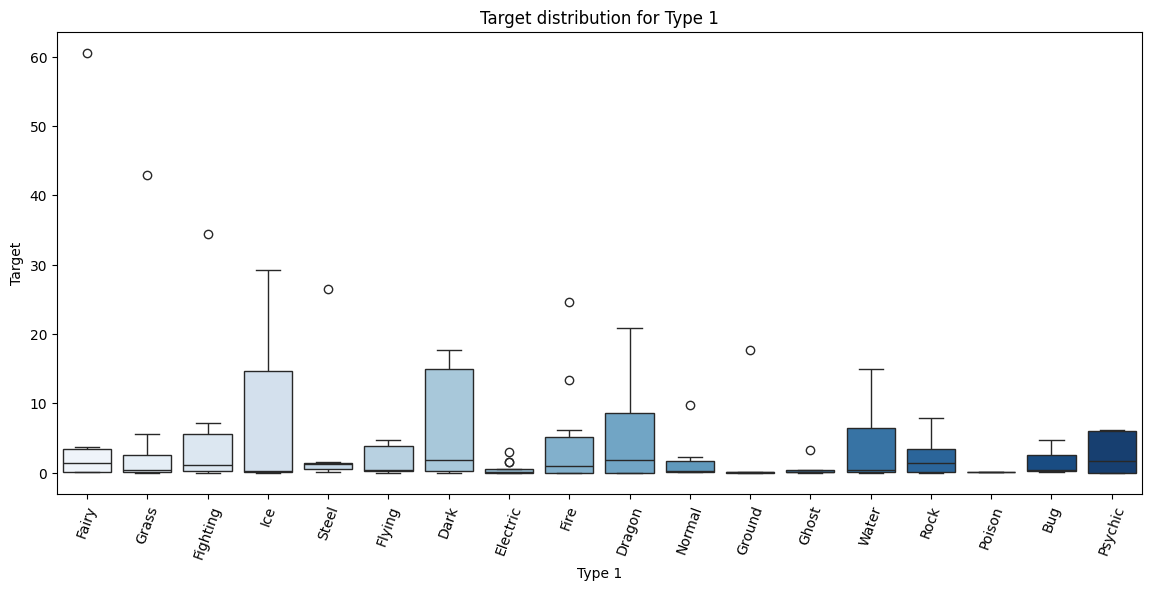

In [5]:
# Figure size
plt.figure(figsize=(14, 6))

# Box plot for Type 1
sns.boxplot(x='Type 1', y='Target', data=df, palette='Blues')
plt.title('Target distribution for Type 1')
plt.xticks(rotation=70)
plt.grid(False)

plt.show()

<ipython-input-6-fb6473abc00b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type 2', y='Target', data=df, palette='Greens')


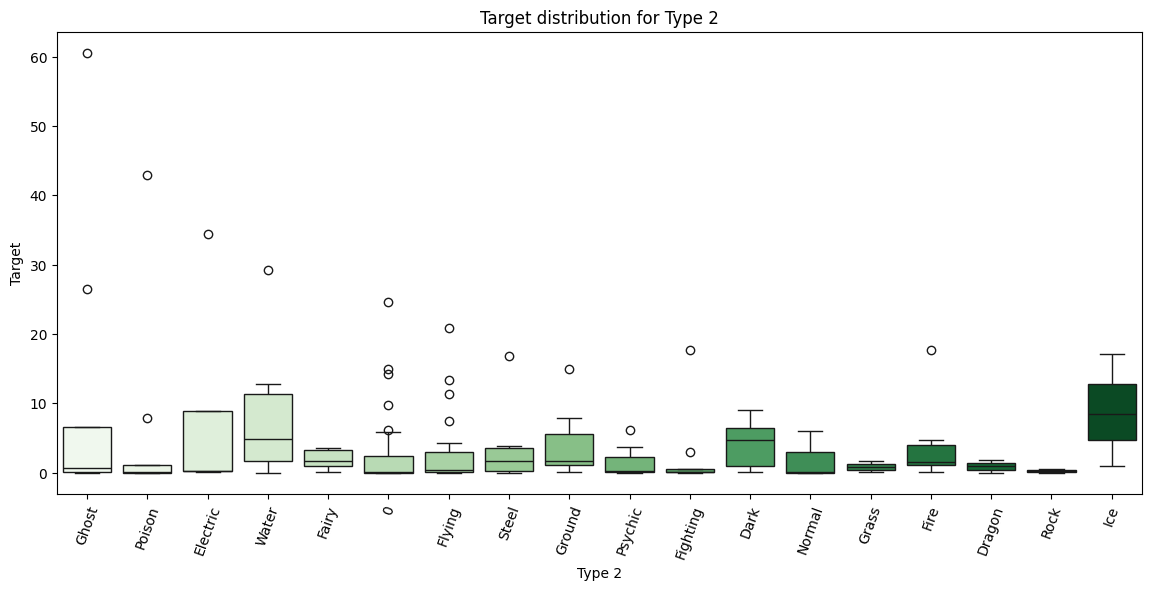

In [6]:
plt.figure(figsize=(14, 6))

# Box plot for Type 2
sns.boxplot(x='Type 2', y='Target', data=df, palette='Greens')
plt.title('Target distribution for Type 2')
plt.xticks(rotation=70)
plt.grid(False)

plt.show()

# Distribution of Pok ́emon Types

In [7]:
# List of categorical variables
categorical_vars = ["Type 1", "Type 2", "item effect", "Ability", "status effect move 1", "status effect move 2", "status effect move 3", "status effect move 4"]

# Calculate the frequency of values in the "Type 1" column
type1_counts = df['Type 1'].value_counts()

# Convert to DataFrame
type_counts = type1_counts.reset_index()
type_counts.columns = ['Type', 'Frequency']

# Create "target_close_to_one" column
df['target_close_to_one'] = df['Target'] >= 0.8

# Merge the frequency DataFrame(type_counts) with the original DataFrame(df) to obtain the "target_close_to_one" column for "Type 1".
merged_df = pd.merge(type_counts, df[['Type 1', 'target_close_to_one']], left_on='Type', right_on='Type 1', how='left')

# Calculate the frequency of target_close_to_one for each type
agg_df = merged_df.groupby(['Type', 'target_close_to_one']).size().reset_index(name='Count')

total_counts = type_counts.copy()

# Create column to combine 'Type' and 'target_close_to_one' for side-by-side bar chart
agg_df['Type_target'] = agg_df['Type'].astype(str) + '_' + agg_df['target_close_to_one'].astype(str)

# Bar chart of frequency of types for Type 1
bar1 = alt.Chart(agg_df).mark_bar().encode(
    x=alt.X('Type_target:N', axis=alt.Axis(title='Type 1', labelAngle=-45, grid=False), sort=alt.SortField(field='Count', order='descending')),
    y=alt.Y('Count:Q', axis=alt.Axis(title='Frequency', grid=False)),
    color=alt.Color('target_close_to_one:N', scale=alt.Scale(domain=[False, True], range=['lightblue', 'orange']), legend=alt.Legend(title='Target >= 0.8')),
    tooltip=['Type', 'target_close_to_one', 'Count']
).properties(
    title='Frequency of Type 1 vs Target >= 0.8'
)

# Line for totals
line1 = alt.Chart(total_counts).mark_line(color='red').encode(
    x=alt.X('Type:N'),
    y=alt.Y('Frequency:Q', axis=alt.Axis(title='Total Frequency', grid=False)),
    tooltip=['Type', 'Frequency']
)

# Combine Histogram and Line
chart1 = alt.layer(bar1, line1).resolve_scale().properties(
    title='Frequency of Type 1 vs Target >= 0.8'
)

chart1.display()


alt.LayerChart(...)

For enhanced clarity and ease of representation, we will generate the histogram depicting the frequencies in an alternate version

In [8]:
# Calculate the frequency of values in the "Type 1" and "Type 2" columns
type1_counts = df['Type 1'].value_counts()
type2_counts = df['Type 2'].value_counts()

# Combine the results for "Type 1" and "Type 2"
type_counts = pd.concat([type1_counts, type2_counts], axis=0)
type_counts = type_counts.groupby(type_counts.index).sum().reset_index()
type_counts.columns = ['Type', 'Frequency']

# Merge the frequency DataFrame with the original DataFrame to obtain the "target_close_to_one" column for both types.
merged_df = pd.merge(type_counts, df[['Type 1', 'target_close_to_one']], left_on='Type', right_on='Type 1', how='left')
merged_df2 = pd.merge(type_counts, df[['Type 2', 'target_close_to_one']], left_on='Type', right_on='Type 2', how='left')

# Calculate the frequency of target_close_to_one for each type
agg_df = merged_df.groupby(['Type', 'target_close_to_one']).size().reset_index(name='Count')
agg_df2 = merged_df2.groupby(['Type', 'target_close_to_one']).size().reset_index(name='Count')

# Bar chart creation
chart1 = alt.Chart(agg_df).mark_bar().encode(
    x=alt.X('Type:N', axis=alt.Axis(title='Type 1', labelAngle=-45, grid=False)),
    y=alt.Y('Count:Q', axis=alt.Axis(title='Frequency', grid=False)),
    color=alt.Color('target_close_to_one:N', scale={'domain': [False, True], 'range': ['lightblue', 'orange']}, legend=alt.Legend(title='Target >= 0.8')),
    tooltip=['Type', 'target_close_to_one', 'Count']
).properties(
    title='Frequency of Type 1 vs Target >= 0.8'
).interactive()

chart2 = alt.Chart(agg_df2).mark_bar().encode(
    x=alt.X('Type:N', axis=alt.Axis(title='Type 2', labelAngle=-45, grid=False)),
    y=alt.Y('Count:Q', axis=alt.Axis(title='Frequency', grid=False)),
    color=alt.Color('target_close_to_one:N', scale={'domain': [False, True], 'range': ['lightblue', 'orange']}, legend=alt.Legend(title='Target >= 0.8')),
    tooltip=['Type', 'target_close_to_one', 'Count']
).properties(
    title='Frequency of Type 2 vs Target >= 0.8'
).interactive()

chart1.display()
chart2.display()

alt.Chart(...)

alt.Chart(...)

# Categorical Variable Analysis

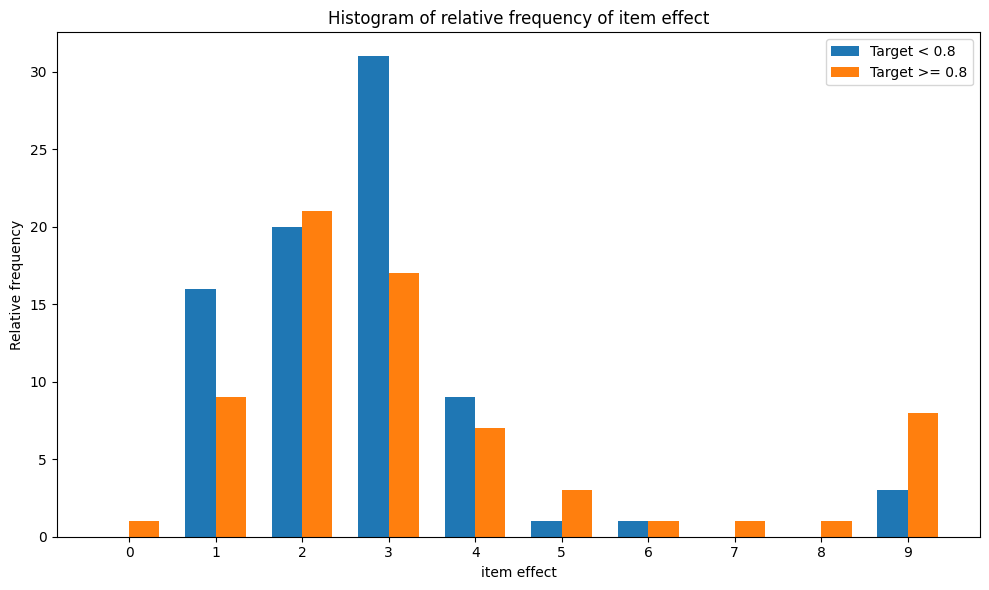

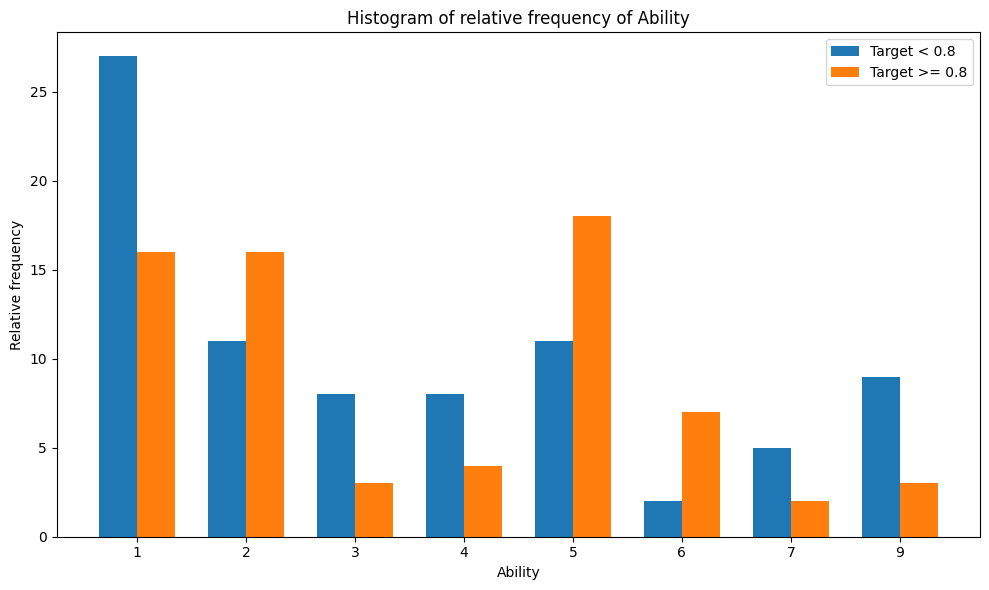

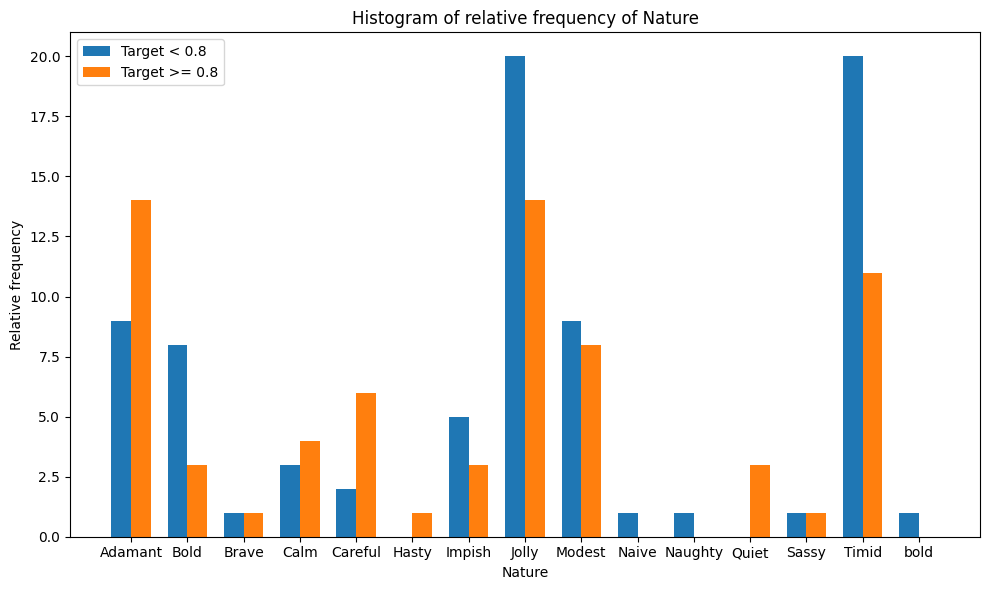

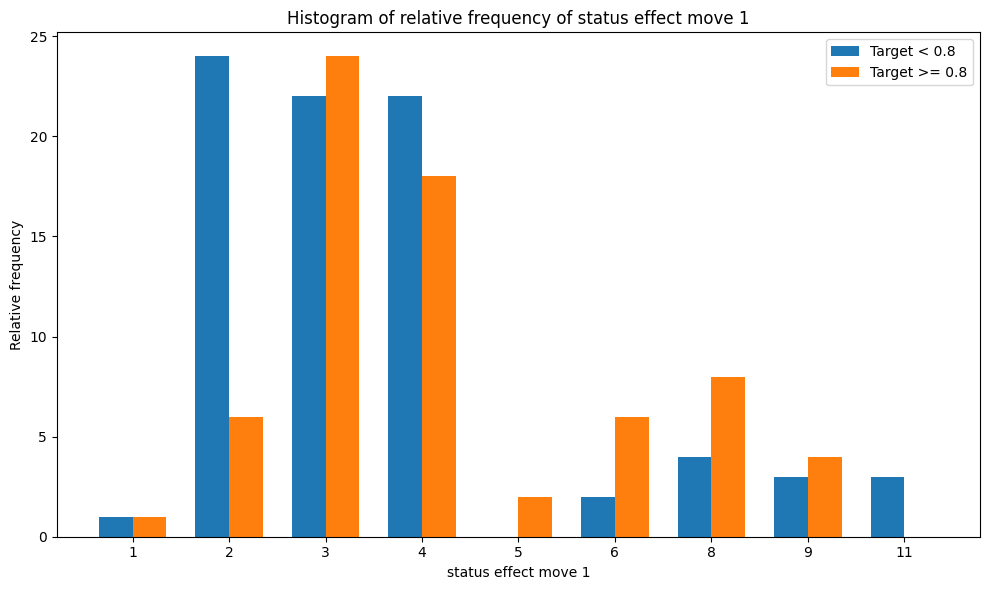

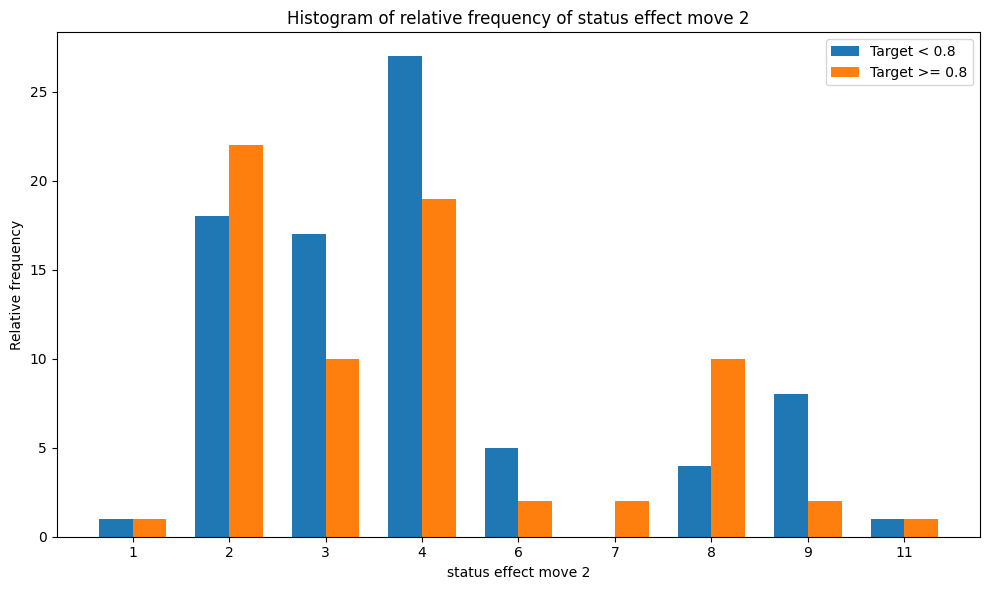

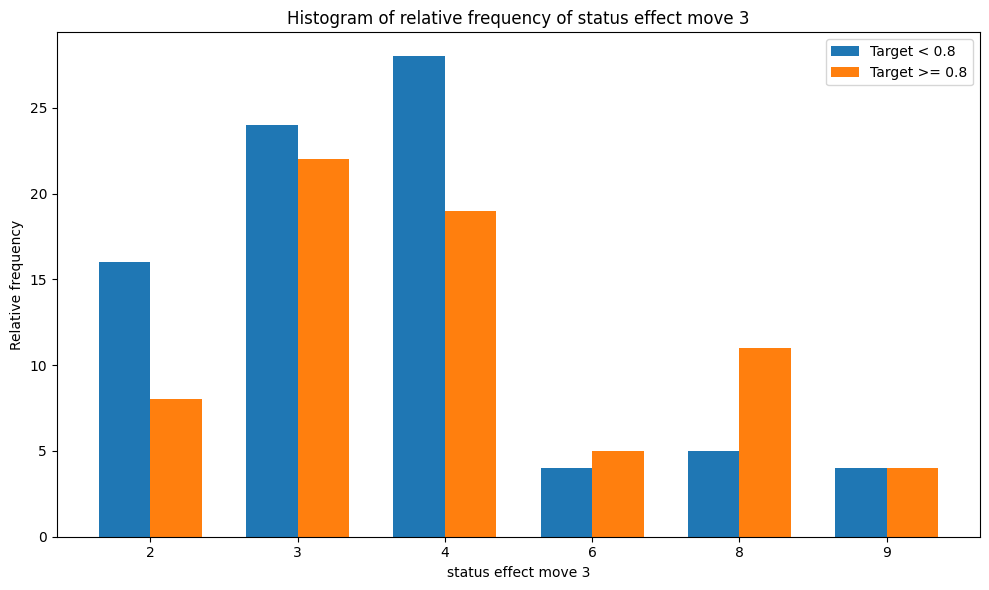

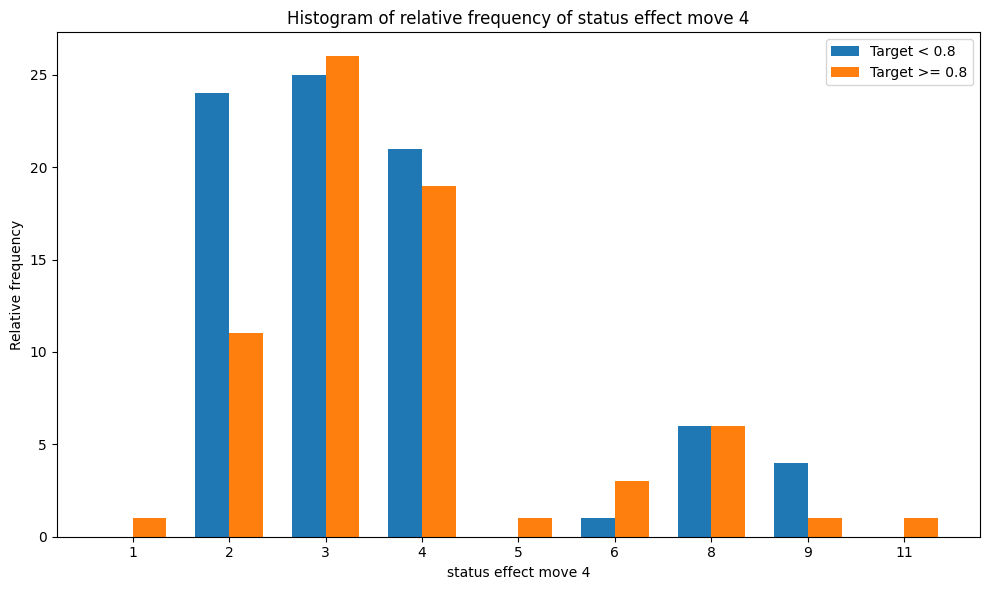

In [9]:
# Select the categorical variables to examine
categorical_vars = ['item effect', 'Ability', 'Nature', 'status effect move 1',
                    'status effect move 2', 'status effect move 3', 'status effect move 4']

# Splitting item effects based on the condition on the Target
df['Target_category'] = pd.cut(df['Target'], bins=[-float('inf'), 0.8, float('inf')], labels=['<0.8', '>=0.8'])

for var in categorical_vars:
    # Frequencies for each combination of var and Target_category
    counts = df.groupby([var, 'Target_category']).size().unstack(fill_value=0)

    plt.figure(figsize=(10, 6)) # Histogram creation
    bar_width = 0.35
    index = range(len(counts.index))

    # Bars fot Target < 0.8
    plt.bar(index, counts['<0.8'], width=bar_width, label='Target < 0.8')

    # Bars for Target >= 0.8
    plt.bar([i + bar_width for i in index], counts['>=0.8'], width=bar_width, label='Target >= 0.8')

    plt.xlabel(var)
    plt.ylabel('Relative frequency')
    plt.title(f'Histogram of relative frequency of {var}')
    plt.xticks([i + bar_width / 2 for i in index], counts.index)
    plt.legend()

    # Layout
    plt.tight_layout()
    plt.show()

# Numeric Variable Analysis

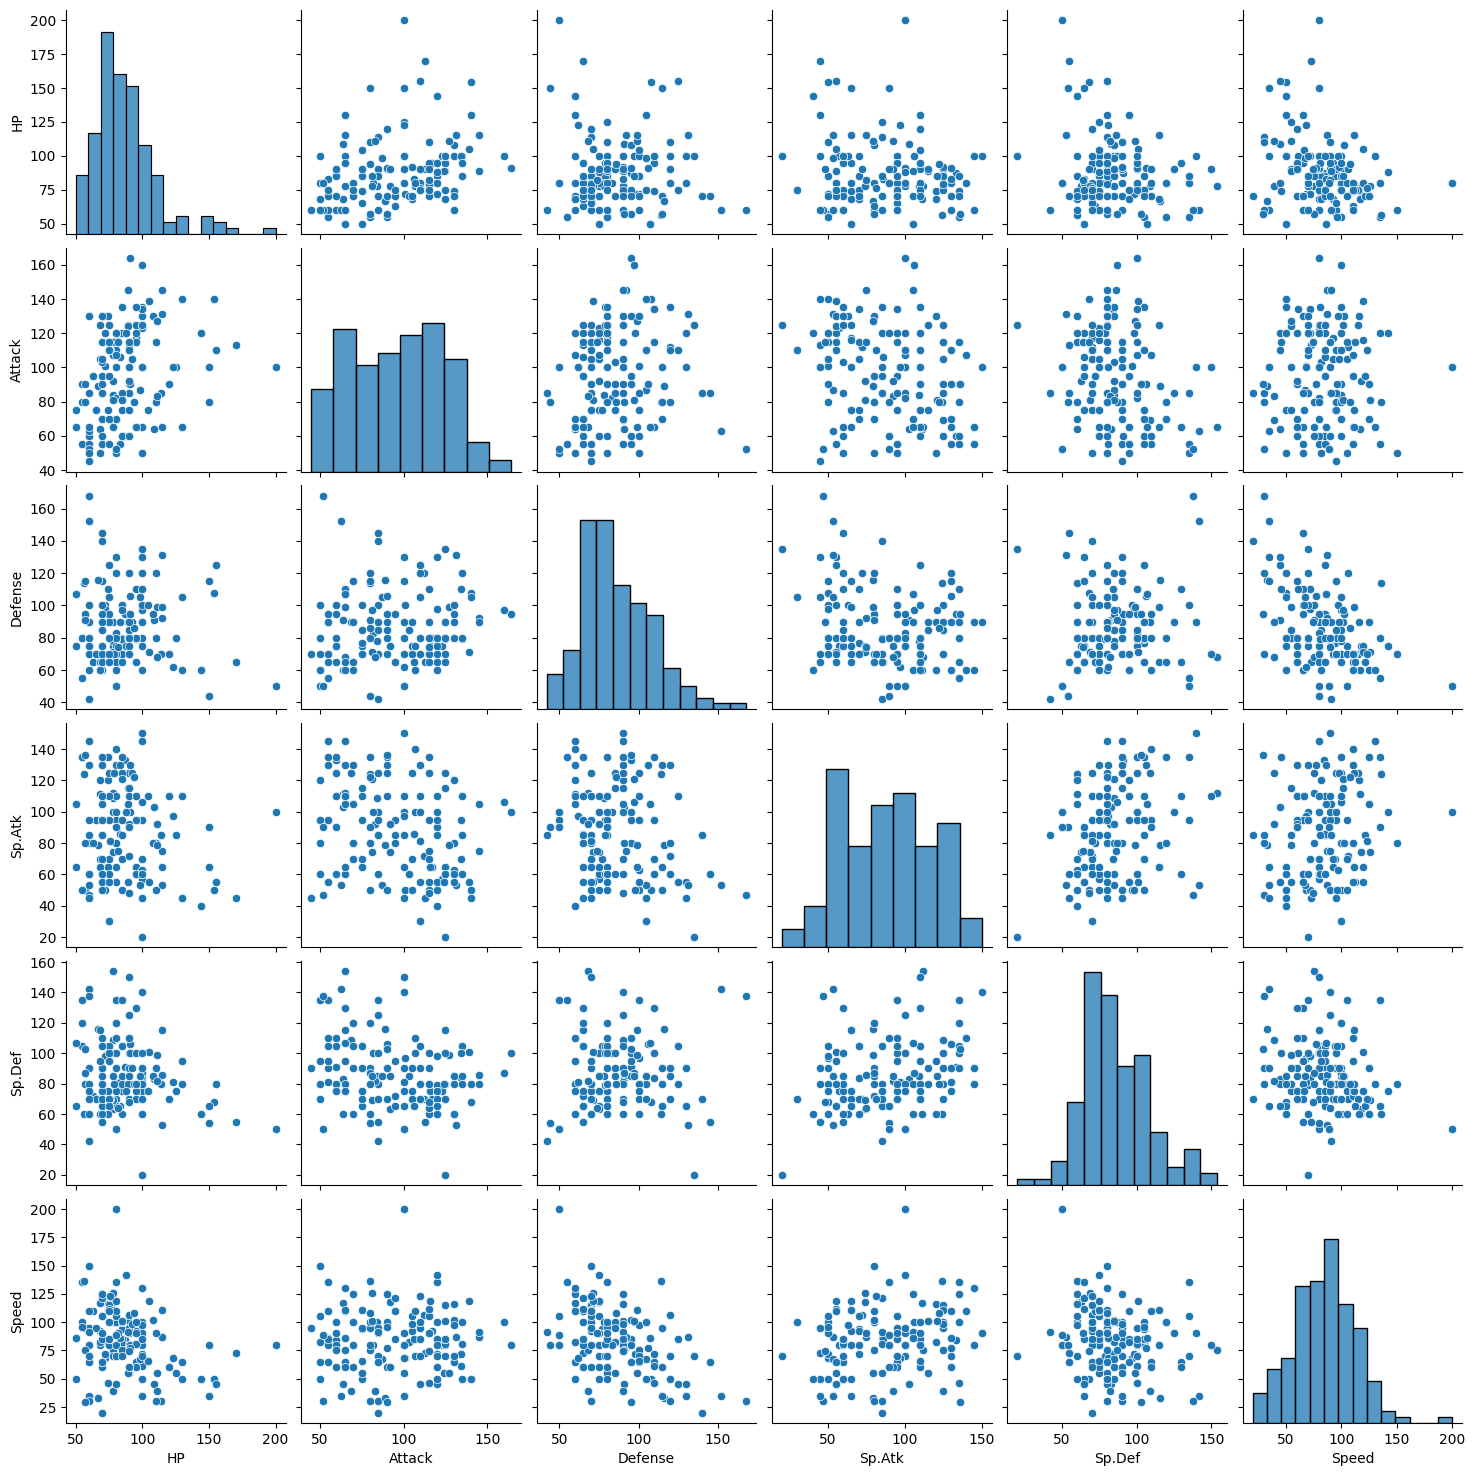

In [10]:
# Select the numerical variables to examine
numerical_vars = ["HP", "Attack", "Defense", "Sp.Atk", "Sp.Def", "Speed"]

# Pair plot for numerical variables
sns.pairplot(df[numerical_vars])
plt.show()

Alcune variabili numeriche hanno varianza pari a 0 quindi sono state escluse nel calcolo della correlazione

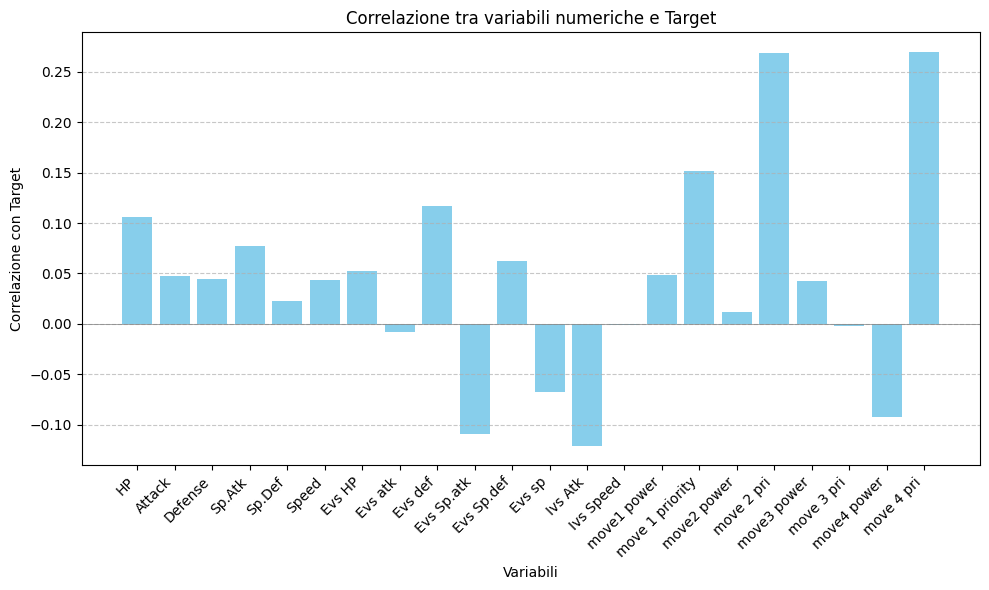

In [11]:
# Select the numerical variables to examine for the correlation
numerical_vars = ['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed',
                  'Evs HP', 'Evs atk', 'Evs def', 'Evs Sp.atk', 'Evs Sp.def', 'Evs sp',
                  'Ivs Atk', 'Ivs Speed', 'move1 power', 'move 1 priority',
                  'move2 power', 'move 2 pri',
                  'move3 power', 'move 3 pri',
                  'move4 power', 'move 4 pri']

# Calculation of the correlation matrix
corr_matrix = df[numerical_vars].corrwith(df['Target'])

plt.figure(figsize=(10, 6))
plt.bar(corr_matrix.index, corr_matrix.values, color='skyblue')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlabel('Variabili')
plt.ylabel('Correlazione con Target')
plt.title('Correlazione tra variabili numeriche e Target')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y axis grid
plt.tight_layout()
plt.show()